Credits:https://huggingface.co/blog/manu/colpali
https://www.ipcc.ch/site/assets/uploads/2018/02/WGIIAR5-Chap3_FINAL.pdf
---



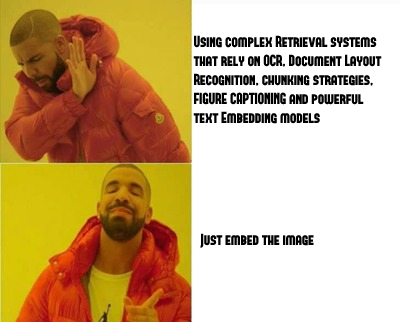

In [16]:
from IPython.display import Image
Image(filename='/content/image.jpeg',width=500,height=500)

## Install Byaldi

We will install byaldi using pip to get started.

In [ ]:
!pip install --upgrade byaldi

In [ ]:
!sudo apt-get install -y poppler-utils

In [ ]:
!pip install -q pdf2image git+https://github.com/huggingface/transformers.git qwen-vl-utils flash-attn

Let's see how the PDF looks like.

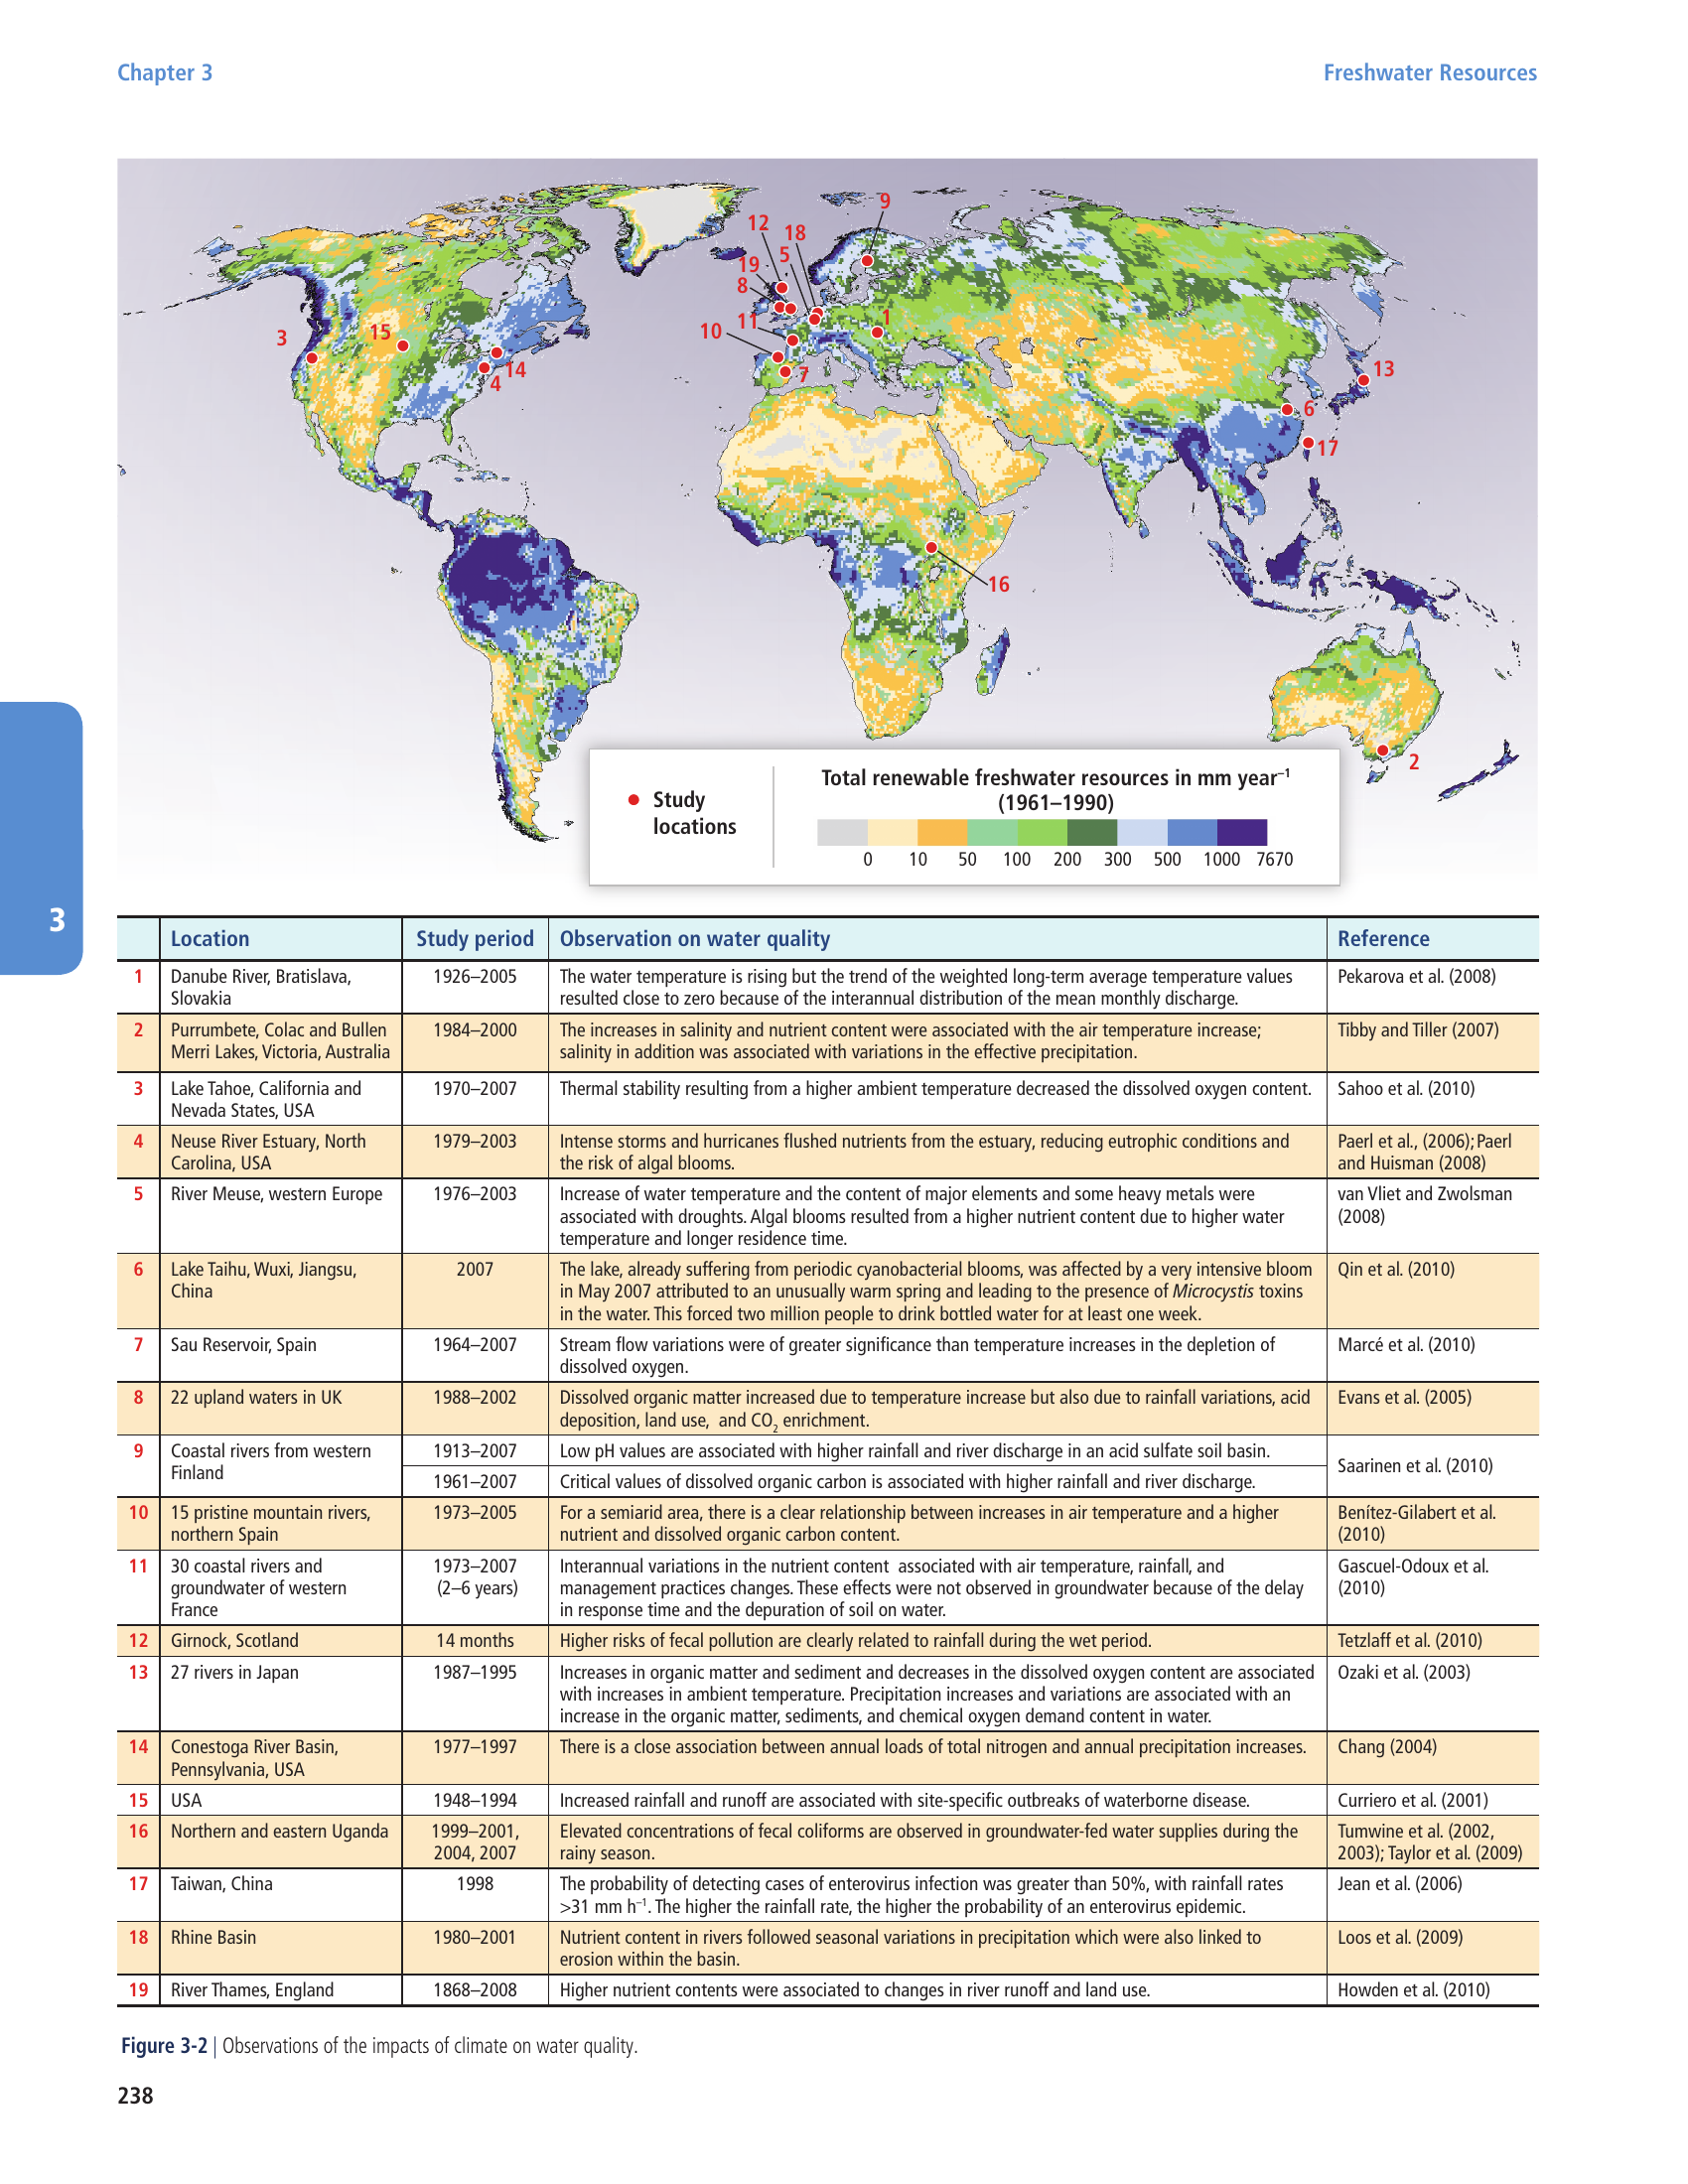

In [12]:
from pdf2image import convert_from_path

images = convert_from_path("/content/WG.pdf")
images[9]

We should initialize `RAGMultiModalModel` object with a ColPali model from Hugging Face.

In [ ]:
from byaldi import RAGMultiModalModel

RAG = RAGMultiModalModel.from_pretrained("vidore/colpali")

We can directly index our document using RAG, simply passing pdf file path is enough.

In [ ]:
RAG.index(
    input_path="/content/WG.pdf",
    index_name="image_index", # index will be saved at index_root/index_name/
    store_collection_with_index=False,
    overwrite=True
)

Now let's retrieve!

In [9]:
text_query = "How many regions were survyed in the world map?"
results = RAG.search(text_query, k=1)
results

[{'doc_id': 0, 'page_num': 10, 'score': 20.0, 'metadata': {}, 'base64': None}]

The answer was indeed on page 10!!!

Now we can actually build a RAG pipeline... wait for part #2 of this series!